## Phase 3

### Header
#### Course Name: Data Intensive Computing
#### Project name: Book Recommendation System

### Q Write down the following information: 
#### 1. Problem Statement: Recommendation systems have been used in various large platforms like e-commerce, entertainment. Online Book recommendations have also been implemented by a few public domains to give customers a more personalized experience. But there are a few setbacks such as recommending genres which are not relevant to user. Our project would be a system that recommends additional books based on previous reads, similar genre, author and publisher. These systems can help companies increase sales and thus improve overall profits. Our main goal is to recommend the best books pertinent to the user.



#### 2. Hypothesis:
   + hypothesis 1:  
   + hypothesis 2:
   + ...

#### Overview:
  In recommender systems, as with almost every other machine learning problem, the techniques and models we use are heavily dependent on the quality and quantity of data we possess. There are three major recommendation systems.

   + Content-based method
   + Collaborative Filtering methods
   + Hybrid methods

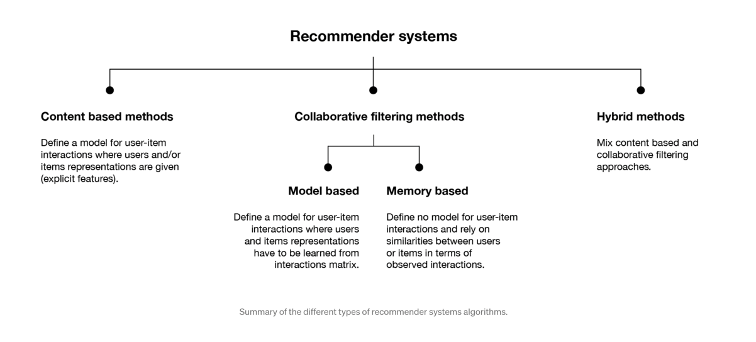

**References:**

*   https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada
*   https://towardsdatascience.com/recommendation-systems-models-and-evaluation-84944a84fb8e

**Note**
Our data was huge and could not be run on colab due to memory issues, hence jupyter notebook is also attached for you to run the codes. Output of the codes has been pasted in this notebook.

In [ ]:
pip install surprise

     |████████████████████████████████| 11.8MB 5.3MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617561 sha256=202309b9deb32b5035bd525277ecca9b6e3a186a104edbfc2c652cebf15b9ef6
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
from nltk.corpus import stopwords
from contextlib import contextmanager
from IPython.display import display, clear_output
import ipywidgets as widgets
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 3 Cleaned Datasets
Display the cleaned dataset after phase 1


In [ ]:
# import your cleaned dataset
cdata = pd.read_csv("/content/drive/MyDrive/Data/Cleaned_Data.csv", error_bad_lines= False, encoding = "latin_1")
books = pd.read_csv("/content/drive/MyDrive/Data/Cleaned_Books.csv",  error_bad_lines= False, encoding = "latin_1")
ratings = pd.read_csv("/content/drive/MyDrive/Data/Cleaned_Ratings.csv", error_bad_lines= False, encoding = "latin_1")
users = pd.read_csv("/content/drive/MyDrive/Data/Cleaned_Users.csv", error_bad_lines= False, encoding = "latin_1")
# display the first five rows data.head(5)
cdata.head()

,User-ID,ISBN,Book-Rating,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Country,Category,Age_groups
0,276725,034545104X,0,18,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA,Latest,"(10.0, 30.0]"
1,2313,034545104X,5,23,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA,Latest,"(10.0, 30.0]"
2,6543,034545104X,5,34,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA,Latest,"(30.0, 50.0]"
3,8680,034545104X,5,34,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA,Latest,"(30.0, 50.0]"
4,10314,034545104X,9,13,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA,Latest,"(10.0, 30.0]"


In [ ]:
df = pd.DataFrame(cdata)
df.head()

,User-ID,ISBN,Book-Rating,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Country,Category,Age_groups
0,276725,034545104X,0,18,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA,Latest,"(10.0, 30.0]"
1,2313,034545104X,5,23,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA,Latest,"(10.0, 30.0]"
2,6543,034545104X,5,34,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA,Latest,"(30.0, 50.0]"
3,8680,034545104X,5,34,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA,Latest,"(30.0, 50.0]"
4,10314,034545104X,9,13,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA,Latest,"(10.0, 30.0]"


#### 4 Modeling  
Please take a look at https://scikit-learn.org/stable/. First of all, understand what is the problem of your research such as classification problem, regression problem, clustering problem...... Then choose your algorithm. For each algorithm, you need to answer the following 5 questions. We give the example answer in section 6. 

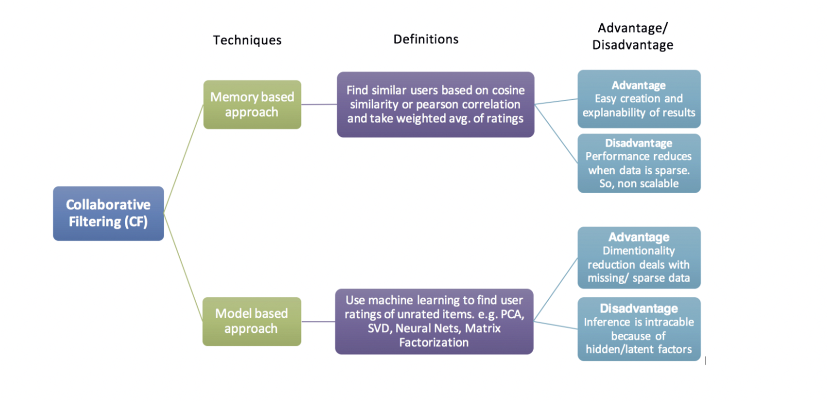

**4.1 Method 1**

#### Q: What assumptions need to be verified at this step?
#### A: In the User based model, we are finding the list of recommendations by taking a particular user and identifying users that are similar to that user based on similarity of ratings. Then it will recommend items that are similar to the ones the users liked.
#### Q: What algorithm did you choose?
#### A: **Model based approach - User based CF**
#### Q: Why you choose this algorithm?
#### A: CF methods work with the interaction matrix that can also be called a rating matrix in the rare case when users provide explicit rating of items. These systems try to predict the rating that a user would give an item, based on past ratings and preferences of other users. One of the benefits of this model is that it doesn't require item metadata like its content-based counterparts.
#### Q: What metric can measure the quality of your algorithm?
#### A: We have used **Root-mean-square error (RMSE)** to evaluate our algorithm.
#### Q: What is the outcome?
#### A: We divided the data into two parts containing training data of 80% and test data of 20%. The operations are performed on training data and the model is validated on the test data to see, how good fit the model is. The model is created on user id and ISBN of the books data features. The train and test matrices are created with users and books as their rows and columns. These matrices are then run on the cosine similarity to generate the User model. The model is then validated on the test data.
#### Q: Analysis and discussion:
#### A: By looking at the RMSE score of train and test data, we can say that our model is giving good predictions.

In [ ]:
# Splitting the data into train and test sets
train_data, test_data = model_selection.train_test_split(df, test_size=0.20)

array([ 0,  5,  9,  8,  6,  7,  4, 10,  3,  2,  1])

In [ ]:
print(f'Training set lengths: {len(train_data)}')
print(f'Testing set lengths: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

In [ ]:
# Get int mapping for user_id in train dataset

u_unique_train = train_data['User-ID'].unique()  
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}

# Get int mapping for isbn in train dataset

i_unique_train = train_data['ISBN'].unique()  
train_data_book2idx = {o:i for i, o in enumerate(i_unique_train)}

# Get int mapping for user_id in test dataset

u_unique_test = test_data['User-ID'].unique()  
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}

# Get int mapping for isbn in train dataset

i_unique_test = test_data['ISBN'].unique() 
test_data_book2idx = {o:i for i, o in enumerate(i_unique_test)}

In [ ]:
# TRAINING SET
train_data['u_unique'] = train_data['User-ID'].map(train_data_user2idx)
train_data['i_unique'] = train_data['ISBN'].map(train_data_book2idx)

# TESTING SET
test_data['u_unique'] = test_data['User-ID'].map(test_data_user2idx)
test_data['i_unique'] = test_data['ISBN'].map(test_data_book2idx)

# Convert back to 3-column df
train_data = train_data[['u_unique', 'i_unique', 'Book-Rating']]
test_data = test_data[['u_unique', 'i_unique', 'Book-Rating']]

In [ ]:
n_users = train_data['u_unique'].nunique()
n_books = train_data['i_unique'].nunique()

train_matrix = np.zeros((n_users, n_books))

for entry in train_data.itertuples():                  # entry[1] is the user-id, entry[2] is the book-isbn
    train_matrix[entry[1]-1, entry[2]-1] = entry[3]    # -1 is to counter 0-based indexing


(1433, 172767)


ISBN,0000913154,0001010565,0001046438,000104687X,0001047213,0001047663,000104799X,0001048473,0001049879,0001053744,0001055607,0001056107,000123207X,0001232088,0001374362,0001382381,000171421X,0001714236,0001714600,0001811150,0001821326,0001837397,0001840517,0001841572,000184251X,0001845039,0001848445,0001848461,0001900277,0001935968,0001939203,0001941941,0001944711,0001944835,0001945203,0001952803,0001953877,000195833X,0001961721,0001981307,...,B000023VWR,B000023VWW,B000023VWY,B00004THMF,B000051X7T,B000051ZUT,B0000523SS,B0000523SU,B0000523SW,B0000523SY,B000055Z5S,B00005LD7A,B00005TZWI,B00005U7YK,B00006391H,B0000640CT,B000068RVK,B000069F44,B00006CRTE,B00007FYKO,B00007MAM9,B00008JYQC,B00008NRHQ,B000092Q0A,B00009APKU,B00009MBYK,B0000A2U93,B0000AFX9D,B0000C2W5U,B0000DAPP1,B0000DYXID,B0000VZEFK,B0000X8HIE,B00013AFZQ,B00013AWZY,B00013AX6W,B00013AX9E,B0001FZGTO,B0001GDNCK,B0001I1KOG
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
n_users = test_data['u_unique'].nunique()
n_books = test_data['i_unique'].nunique()

test_matrix = np.zeros((n_users, n_books))

for entry in test_data.itertuples():
    test_matrix[entry[1]-1, entry[2]-1] = entry[3]

1433 172767


In [ ]:

train_matrix_small = train_matrix[:5000, :5000]
test_matrix_small = test_matrix[:5000, :5000]

from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_matrix_small, metric='cosine')
item_similarity = pairwise_distances(train_matrix_small.T, metric='cosine')

In [ ]:
from surprise import KNNBasic
import heapq
from collections import defaultdict
from operator import itemgetter
from sortedcontainers import SortedList
from utils import *

from BookData import BookDataSet
from EvaluationData import CreateDataSets
from EvaluatedAlgorithm import EvaluatedAlgorithm


class SimpleCollaborativeFiltering:
    """
    K-Nearest Neighbors Collaborative Filtering System
    
    Attributes:
        data (object): surprise Book Dataset object
        k (int): number of books to recommend 
        max_rating (float): max rating in dataset
    """

    def __init__(self, ratings, books, users, k=10, max_rating=10.0):
        """
        Args:
            ratings (pandas df): ratings dataframe 
            books (pandas df): book information dataframe 
            users (pandas df): user information dataframe
            k (int): number of books to recommend 
            max_rating (float): max rating in dataset
        """
        self.data = BookDataSet(ratings, books, users)
        self.k = k
        self.max_rating = max_rating
        
    def get_neighbors(self, user_id, user_based_=True, metric='cosine', verbose=False):
        """
        Trains a model based on user based CF or item based CF
        Computes interation matrix and returns matrix and rows correspoonding with the user 
        Args:
            user_id (int): user id 
            user_based_ (boolean): use user based CF (True) or item based CF (False)
            metric (str): similarity metric 
            verbose (boolean): print output 
        Returns:
            interations (surprise matrix): similarity matrix 
            similarity_rows (list): user rows 
        """
        # create model
        self.train = self.data.build_full_trainset()
        sim_options = {'name': metric,
                       'user_based': user_based_
        }
        model = KNNBasic(sim_options=sim_options, verbose=verbose)
        model.fit(self.train)
        interations = model.compute_similarities()

        self.surprise_user_id = self.train.to_inner_uid(user_id)
        similarity_rows = interations[self.surprise_user_id]
        return interations, similarity_rows

    def show_top_books(self, candidates, watched_list):
        """
        Prints out top K books and corresponding score 
        Args:
            candidates (defaultdict): book id and score ({book_id:score})
            watched_list (list): list of books that the user has already seen
        """
        # print out top 10 books and score 
        N = 0
        print('Top {} Book Recommendations:'.format(self.k))
        print('\n')
        for item_id, ratings in sorted(candidates.items(), key=itemgetter(1), reverse=True):
            if item_id not in watched_list:
                book_id = self.train.to_raw_iid(item_id)
                book_name = self.data.get_book_name(book_id)
                book_author = self.data.get_book_author(book_id)
                book_year = self.data.get_book_year(book_id)
                try:
                    book_year = int(book_year) 
                except:
                    book_year = 'Not Available'
                print('{} - {} - ({}) - Score: {}'.format(book_name, book_author, book_year, round(ratings, 2)))
                N += 1
                if (N > self.k): break
        
    def user_based(self, user_id, threshold=False):
        """
        User based Collaborative Filtering 
        Args:
            user_id (int): user id 
            threshold (boolean): only use similar users above .95 correlation
        """
        _, similarity_rows = self.get_neighbors(user_id)
        
        similar_users = SortedList(key=lambda x: -x[1])
        for i, score in enumerate(similarity_rows):
            if i != user_id:
                similar_users.add((i, score))
        
        if threshold:
            similar_users = [rating for rating in similar_users if rating[1] >= 0.95]

        candidates = defaultdict(float)
        for similar_user in similar_users[:self.k]:
            surprise_sim_user_idx, score = similar_user
            sim_user_rating = self.train.ur[surprise_sim_user_idx]
            for info in sim_user_rating:
                book_id, rating = info
                # use += and increase weight for books that appear more than once 
                candidates[book_id] += (rating / self.max_rating) * score

        # list of books that the user has seen
        watched_list = [book_id for book_id, rating in self.train.ur[self.surprise_user_id]]

        # Get top-rated items from similar users
        self.show_top_books(candidates, watched_list)
        
    

In [ ]:
# sample user (this user seems to like action and exciting books )
# 234828, 89602, 69697
USER_ID = 69697
books[books.ISBN.isin(ratings.loc[(ratings.User_ID == USER_ID) & (ratings.Book_Rating > 8), 'ISBN'])].head()

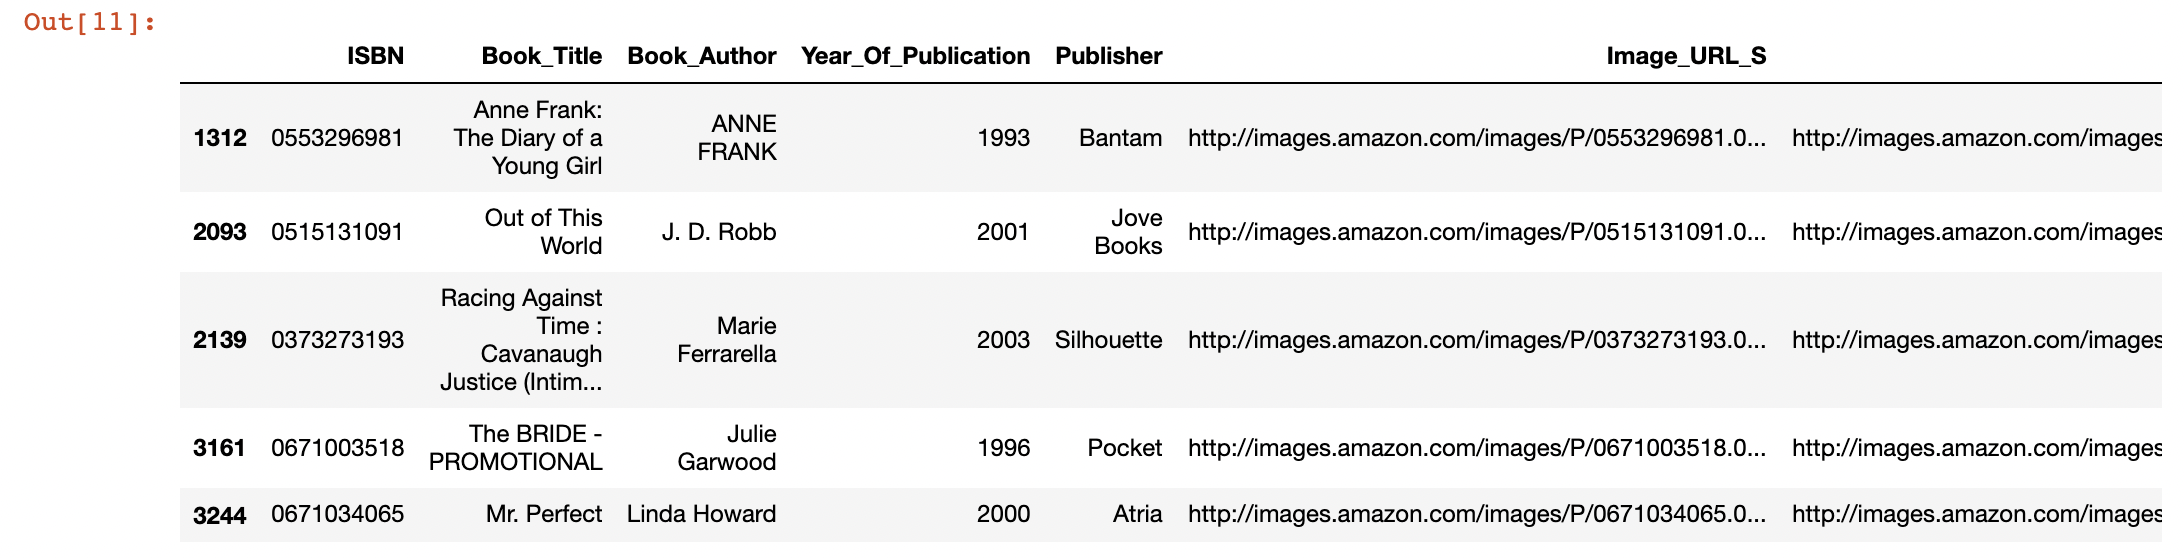

In [ ]:
sample_ratings = popular_ratings(ratings, user_threshold=200, rating_threshold=200, book_threshold=1)
print('Sample Ratings Shape', sample_ratings.shape)
book_ratings = sample_ratings.pivot_table(index='User_ID', columns='ISBN', values='Book_Rating').fillna(0)
book_ratings.head()

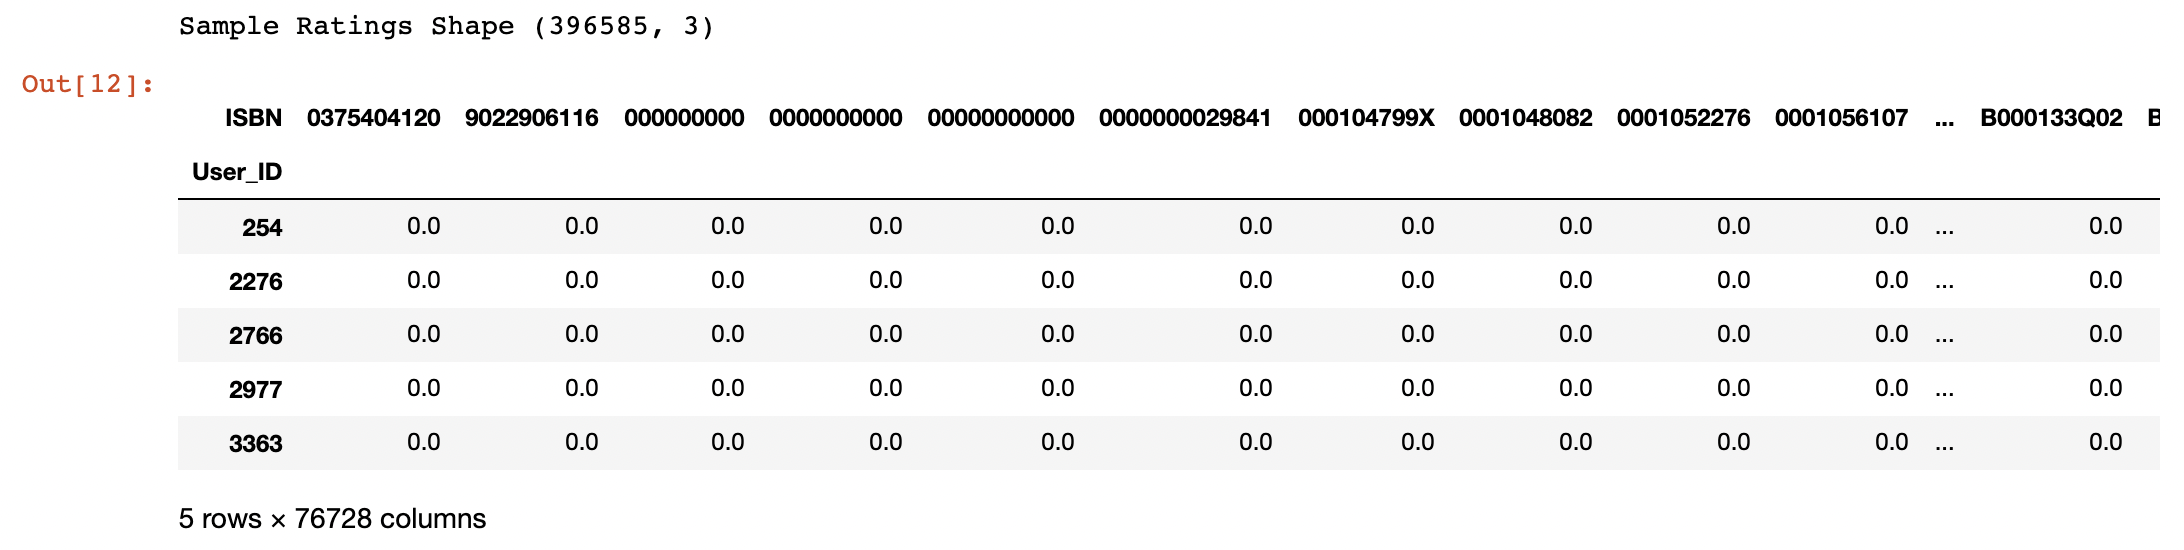

In [ ]:
# create k-Nearest Neighbors Collaborative Filtering model 
cf = SimpleCollaborativeFiltering(sample_ratings, books, users)

In [ ]:
# k-Nearest Neighbors user based collaborative filtering 
cf.user_based(user_id=USER_ID)

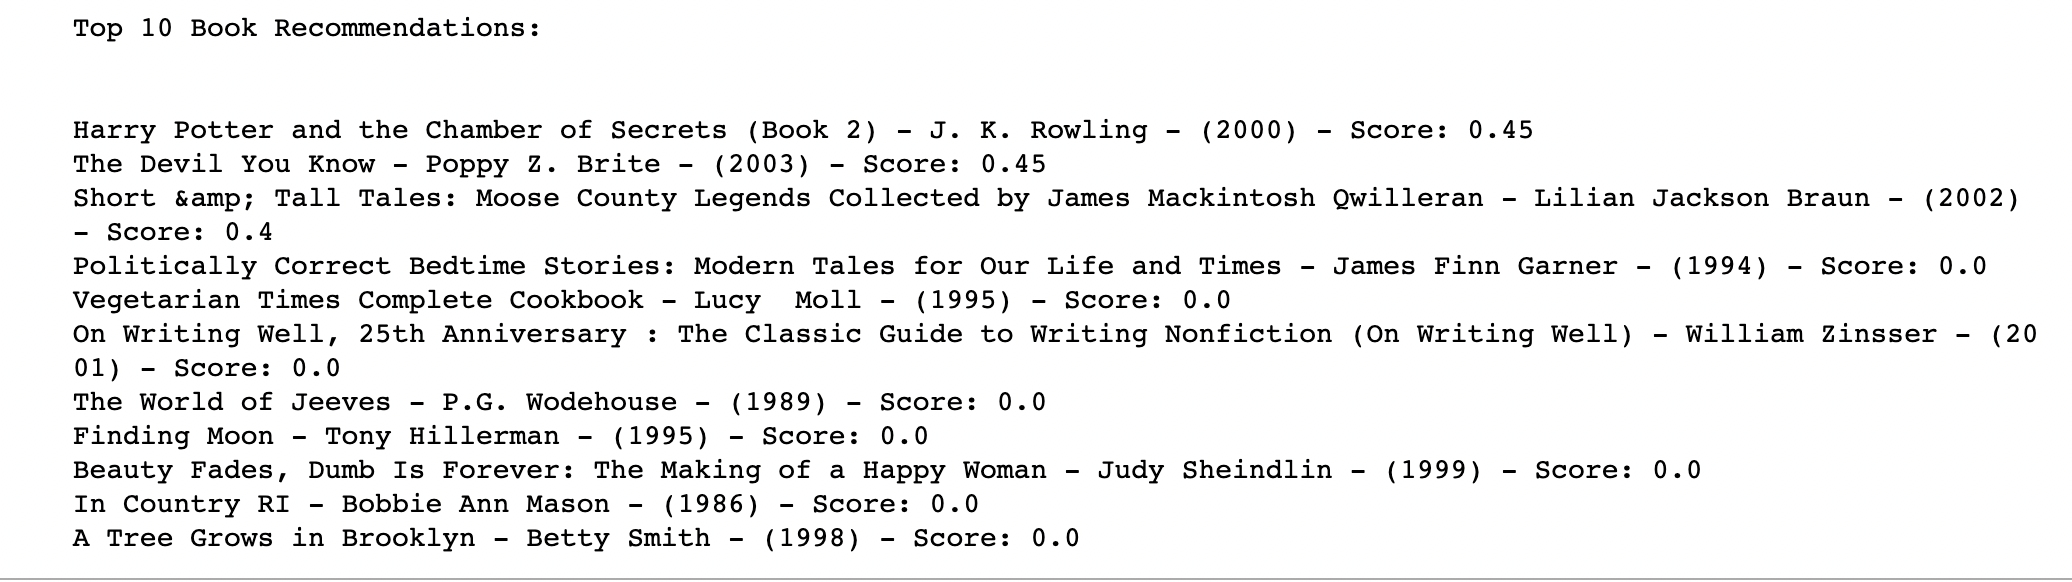

In [ ]:
def predict_books(ratings, similarity, type='user'): # default type is 'user'
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        
        # Use np.newaxis so that mean_user_rating has the same format as ratings
        
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [ ]:
item_prediction = predict_books(train_matrix_small, item_similarity, type='item')

In [ ]:
def rmse(pred, actual):
    # ignore nonzeros items
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))


train_user = rmse(user_prediction, train_matrix_small)
test_user = rmse(user_prediction, test_matrix_small)
print(f'User-based CF train data RMSE: {train_user}')
print(f'User-based CF test data RMSE: {test_user}')

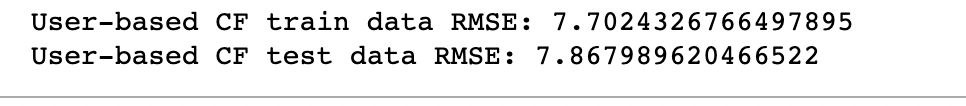

**4.2 Method 2**

#### Q: What assumptions need to be verified at this step?
#### A: In Item-Item model we take an item, find users who liked that item, and find other items that those users or similar users also liked. It takes items and recommends other items in the same way as Amazon does. 
#### Q: What algorithm did you choose?
#### A: **Model based approach - Item based CF**
#### Q: Why you choose this algorithm?
#### A: CF methods work with the interaction matrix that can also be called a rating matrix in the rare case when users provide explicit rating of items. These systems try to predict the rating that a user would give an item based on past ratings and preferences of other users. One of the benefits of this model is that it doesn't require item metadata like its content-based counterparts.
#### Q: What metric can measure the quality of your algorithm?
#### A: We have used **Root-mean-square error (RMSE)** to evaluate our algorithm.
#### Q: What is the outcome?
#### A: The data is divided into two parts of training data of 80% and test data of 20%. The operations are performed on training data and the model is validated on the test data to see how good fit the model is. The model is created on user id and ISBN of the books data features. The train and test matrices are created with users and books as their rows and columns. These matrices are then run on the cosine similarity to generate the Item model. The model is then validated on the test data. Cosine similarity is used in this model. It provides a matrix of similarities that, for each item, provides a list of similar items.
#### Q: Analysis and discussion:
#### A: By looking at the RMSE score of train and test data, we can say that our model is giving good predictions which are similar to user based approach. We can now check how model based CF methods are performing.

In [ ]:
train_data, test_data = model_selection.train_test_split(df, test_size=0.20)

In [ ]:
print(f'Training set lengths: {len(train_data)}')
print(f'Testing set lengths: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

In [ ]:
# Get int mapping for user_id in train dataset

u_unique_train = train_data['User-ID'].unique()  
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}

# Get int mapping for isbn in train dataset

i_unique_train = train_data['ISBN'].unique()  
train_data_book2idx = {o:i for i, o in enumerate(i_unique_train)}

# Get int mapping for user_id in test dataset

u_unique_test = test_data['User-ID'].unique()  
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}

# Get int mapping for isbn in train dataset

i_unique_test = test_data['ISBN'].unique() 
test_data_book2idx = {o:i for i, o in enumerate(i_unique_test)}

In [ ]:
# TRAINING SET
train_data['u_unique'] = train_data['User-ID'].map(train_data_user2idx)
train_data['i_unique'] = train_data['ISBN'].map(train_data_book2idx)

# TESTING SET
test_data['u_unique'] = test_data['User-ID'].map(test_data_user2idx)
test_data['i_unique'] = test_data['ISBN'].map(test_data_book2idx)

# Convert back to 3-column df
train_data = train_data[['u_unique', 'i_unique', 'Book-Rating']]
test_data = test_data[['u_unique', 'i_unique', 'Book-Rating']]

In [ ]:
n_users = train_data['u_unique'].nunique()
n_books = train_data['i_unique'].nunique()

train_matrix = np.zeros((n_users, n_books))

for entry in train_data.itertuples():                  # entry[1] is the user-id, entry[2] is the book-isbn
    train_matrix[entry[1]-1, entry[2]-1] = entry[3]    # -1 is to counter 0-based indexing


In [ ]:
n_users = test_data['u_unique'].nunique()
n_books = test_data['i_unique'].nunique()

test_matrix = np.zeros((n_users, n_books))

for entry in test_data.itertuples():
    test_matrix[entry[1]-1, entry[2]-1] = entry[3]

In [ ]:

train_matrix_small = train_matrix[:5000, :5000]
test_matrix_small = test_matrix[:5000, :5000]

from sklearn.metrics.pairwise import pairwise_distances
item_similarity = pairwise_distances(train_matrix_small.T, metric='cosine')

In [ ]:
from surprise import KNNBasic
import heapq
from collections import defaultdict
from operator import itemgetter
from sortedcontainers import SortedList
from utils import *

from BookData import BookDataSet
from EvaluationData import CreateDataSets
from EvaluatedAlgorithm import EvaluatedAlgorithm


class SimpleCollaborativeFiltering:
    """
    K-Nearest Neighbors Collaborative Filtering System
    
    Attributes:
        data (object): surprise Book Dataset object
        k (int): number of books to recommend 
        max_rating (float): max rating in dataset
    """

    def __init__(self, ratings, books, users, k=10, max_rating=10.0):
        """
        Args:
            ratings (pandas df): ratings dataframe 
            books (pandas df): book information dataframe 
            users (pandas df): user information dataframe
            k (int): number of books to recommend 
            max_rating (float): max rating in dataset
        """
        self.data = BookDataSet(ratings, books, users)
        self.k = k
        self.max_rating = max_rating
        
    def get_neighbors(self, user_id, user_based_=True, metric='cosine', verbose=False):
        """
        Trains a model based on user based CF or item based CF
        Computes interation matrix and returns matrix and rows correspoonding with the user 
        Args:
            user_id (int): user id 
            user_based_ (boolean): use user based CF (True) or item based CF (False)
            metric (str): similarity metric 
            verbose (boolean): print output 
        Returns:
            interations (surprise matrix): similarity matrix 
            similarity_rows (list): user rows 
        """
        # create model
        self.train = self.data.build_full_trainset()
        sim_options = {'name': metric,
                       'user_based': user_based_
        }
        model = KNNBasic(sim_options=sim_options, verbose=verbose)
        model.fit(self.train)
        interations = model.compute_similarities()

        self.surprise_user_id = self.train.to_inner_uid(user_id)
        similarity_rows = interations[self.surprise_user_id]
        return interations, similarity_rows

    def show_top_books(self, candidates, watched_list):
        """
        Prints out top K books and corresponding score 
        Args:
            candidates (defaultdict): book id and score ({book_id:score})
            watched_list (list): list of books that the user has already seen
        """
        # print out top 10 books and score 
        N = 0
        print('Top {} Book Recommendations:'.format(self.k))
        print('\n')
        for item_id, ratings in sorted(candidates.items(), key=itemgetter(1), reverse=True):
            if item_id not in watched_list:
                book_id = self.train.to_raw_iid(item_id)
                book_name = self.data.get_book_name(book_id)
                book_author = self.data.get_book_author(book_id)
                book_year = self.data.get_book_year(book_id)
                try:
                    book_year = int(book_year) 
                except:
                    book_year = 'Not Available'
                print('{} - {} - ({}) - Score: {}'.format(book_name, book_author, book_year, round(ratings, 2)))
                N += 1
                if (N > self.k): break

    def item_based(self, user_id, threshold=False):
        """
        Item based Collaborative Filtering 
        Args:
            user_id (int): user id 
            threshold (boolean): only use similar users above .95 correlation
        """
        interations, _ = self.get_neighbors(user_id, user_based_=False)

        # Get the top K items we rated
        test_user_ratings = self.train.ur[self.surprise_user_id]

        if threshold:
            kNeighbors = [rating for rating in test_user_ratings if rating[1] >= 7.0]
        else:
            kNeighbors = heapq.nlargest(self.k, test_user_ratings, key=lambda t: t[1])
        
        # Get similar items to stuff we liked (weighted by rating)
        candidates = defaultdict(float)
        for item_id, rating in kNeighbors:
            similarity_row = interations[item_id]
            for inner_id, score in enumerate(similarity_row):
                candidates[inner_id] += score * (rating / 10.0)

        # list of books that the user has seen
        watched_list = [book_id for book_id, rating in self.train.ur[self.surprise_user_id]]
        
        # Get top-rated items from similar items
        self.show_top_books(candidates, watched_list)


In [ ]:
# sample user
USER_ID = 69697
books[books.ISBN.isin(ratings.loc[(ratings.User_ID == USER_ID) & (ratings.Book_Rating > 8), 'ISBN'])].head()

In [ ]:
sample_ratings = popular_ratings(ratings, user_threshold=200, rating_threshold=200, book_threshold=1)
print('Sample Ratings Shape', sample_ratings.shape)
book_ratings = sample_ratings.pivot_table(index='User_ID', columns='ISBN', values='Book_Rating').fillna(0)
book_ratings.head()

In [ ]:
# create k-Nearest Neighbors Collaborative Filtering model 
cf = SimpleCollaborativeFiltering(sample_ratings, books, users)

In [ ]:
# k-Nearest Neighbors item based collaborative filtering 
cf.item_based(user_id=USER_ID)

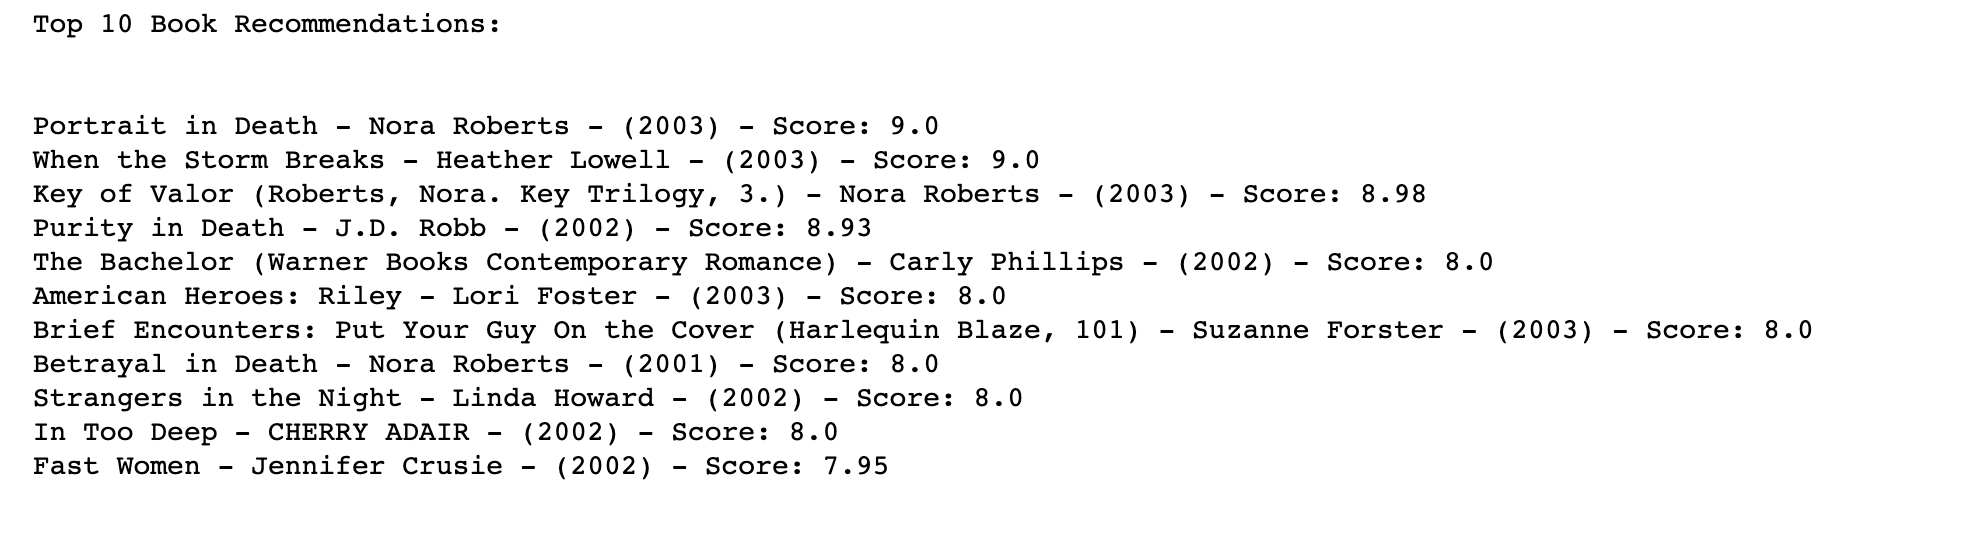

In [ ]:
def predict_books(ratings, similarity, type='user'): # default type is 'user'
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        
        # Use np.newaxis so that mean_user_rating has the same format as ratings
        
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [ ]:
user_prediction = predict_books(train_matrix_small, user_similarity, type='user')

In [ ]:
def rmse(pred, actual):
    # ignore nonzeros items
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

train_item = rmse(item_prediction, train_matrix_small)
test_item = rmse(item_prediction, test_matrix_small)
print(f'Item-based CF train data RMSE: {train_item}')
print(f'Item-based CF test data RMSE: {test_item}')

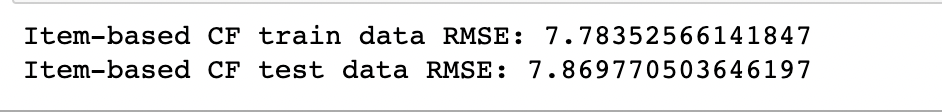

In [ ]:
import matplotlib.pyplot as plt

labels = ['User-based', 'Item-based']
user_means = [train_user, test_user]
item_means = [train_item, test_item]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, user_means, width, label='User')
rects2 = ax.bar(x + width/2, item_means, width, label='Item')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSE')
ax.set_title('RMSE Scores for training and test data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()


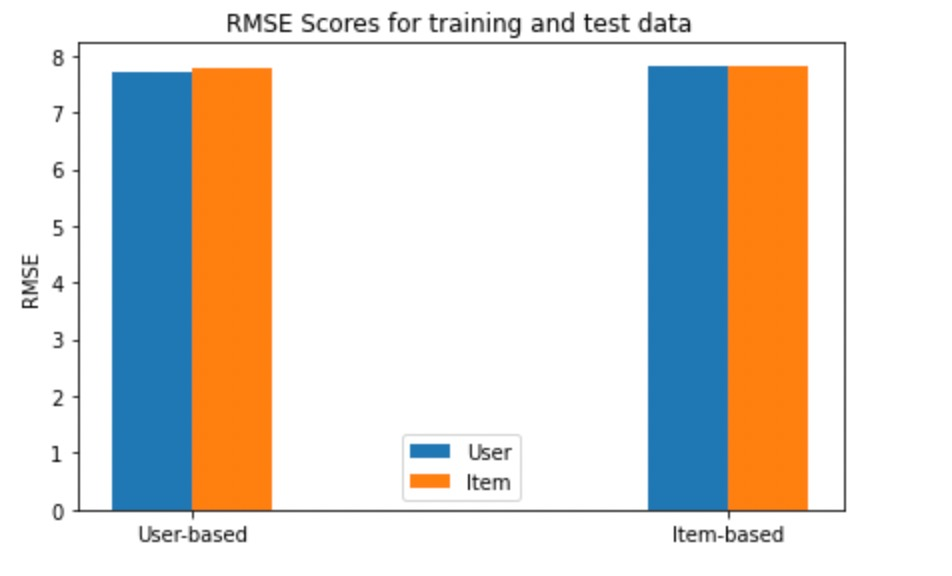

**4.3 Method 3**

#### Q: What assumptions need to be verified at this step?
#### A: Using this algorithm, we are predicting what ratings a particular user will be giving to new books based on his/her purchase and rating history.
#### Q: What algorithm did you choose?
#### A: **Singular value decomposition (SVD) Based Recommender**
#### Q: Why you choose this algorithm?
#### A: We choose this model due to its simplicity and effectiveness when using explicit data. Other optimization methods like ALS are not very effective in case of large explicit ratings matrices.
#### Q: What metric can measure the quality of your algorithm?
#### A: We have used **Root-mean-square error (RMSE)** & **Mean Absolute Error (MAE)** to evaluate our algorithm.
#### Q: What is the outcome?
#### A: We have used the surprise library for implementation of SVD. The data is split in 80% of train data and 20% of test data. Using the SVD, we have implemented the recommender and obtained the book titles and their predicted ratings with respect to a particular user. The model has also been tested on an existing book rating and obtained a very small error factor.
#### Q: Analysis and discussion:
#### A:  The RMSE of the SVD is calculated for the test data and we obtained a value of 1.7178 which clearly shows that the RMSE has improved as compared to the memory-based approach. The RMSE and MAE scores can be seen in the graph per fold.

In [ ]:
# Took only those ratings into considerations which are greater than 0 because in Cleaning process we had given 0 ratings to 
#those books which did not have any ratings
ratings_explicit = df[df['Book-Rating'] != 0]
ratings_implicit = df[df['Book-Rating'] == 0]

In [ ]:
# Kept only 3 columns to create a ratings matrix later on
ratings_explicit = ratings_explicit[['User-ID', 'ISBN', 'Book-Rating']]

In [ ]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating
1,2313,034545104X,5
2,6543,034545104X,5
3,8680,034545104X,5
4,10314,034545104X,9
5,23768,034545104X,9


In [ ]:

from surprise import Reader, Dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings_explicit, reader)

In [ ]:
from surprise import SVD, NMF, model_selection, accuracy
from surprise.model_selection import cross_validate
#Created a SVD model
model = SVD()

# Train on books dataset in 5 folds.
svdData = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.7074  1.7063  1.7111  1.7128  1.7136  1.7103  0.0029  
MAE (testset)     1.3524  1.3510  1.3524  1.3554  1.3578  1.3538  0.0025  
Fit time          48.15   48.61   48.44   48.53   48.20   48.39   0.18    
Test time         2.51    2.15    2.12    2.19    2.02    2.20    0.17    


In [ ]:
svdRmse = svdData.get('test_rmse')
svdMae = svdData.get('test_mae')

In [ ]:
#split the data into train and test sets
trainset, testset = model_selection.train_test_split(data, test_size=0.2)

model = SVD()
model.fit(trainset)

#Tested model and found the predictions
predictions = model.test(testset)

#Calculated RMSE score
accuracy.rmse(predictions)

RMSE: 1.7153


1.7153404595254824

In [ ]:
#Create NMF model to cpmare with SVD
model1 = NMF()

# Train on books dataset
nmfData = cross_validate(model1, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.3841  2.3769  2.3847  2.3812  2.3784  2.3810  0.0031  
MAE (testset)     2.0225  2.0152  2.0214  2.0188  2.0162  2.0188  0.0028  
Fit time          80.33   82.04   82.09   83.33   83.61   82.28   1.16    
Test time         1.48    1.56    2.20    2.19    2.22    1.93    0.34    


In [ ]:
nmfRmse = nmfData.get('test_rmse')
nmfMae = nmfData.get('test_mae')

In [ ]:
#split the data into train and test sets
trainset, testset = model_selection.train_test_split(data, test_size=0.2)

# model1 = NMF()
model1.fit(trainset)

#Tested model and found the predictions
predictions = model1.test(testset)

#Calculated RMSE score
accuracy.rmse(predictions)

RMSE: 1.7137


1.713720767772442

In [ ]:
#Testing random user id
uid = 2313  
iid = '034545104X' 
pred = model.predict(uid, iid, verbose=True)

user: 2313       item: 034545104X r_ui = None   est = 6.10   {'was_impossible': False}


In [ ]:
print(f'The estimated rating for the book with ISBN code {pred.iid} from user #{pred.uid} is {pred.est:.2f}.\n')
actual_rtg= ratings_explicit[(ratings_explicit['User-ID']==pred.uid) & 
                             (ratings_explicit['ISBN']==pred.iid)]['Book-Rating'].values[0]

print(f'The real rating given for this was {actual_rtg:.2f}.')

The estimated rating for the book with ISBN code 034545104X from user #2313 is 6.10.

The real rating given for this was 5.00.


In [ ]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        
    return top_n


In [ ]:
pred = model.test(testset)
top_n = get_top_n(pred)

In [ ]:

def get_reading_list(userid):
    """
    Retrieve full book titles from full 'books_users_ratings' dataframe
    """
    reading_list = defaultdict(list)
    top_n = get_top_n(pred, n=10)
    for n in top_n[userid]:
        book, rating = n
        title = df.loc[df['ISBN']==book]['Book-Title'].unique()[0]
        reading_list[title] = rating
    return reading_list


In [ ]:
#Recommendations for user with id 116866
example_reading_list = get_reading_list(userid = 116866)
for book, rating in example_reading_list.items():
    print(f'{book}: {rating}')

The Flanders Panel: 8.629905308993289
Prairyerth   A Deep Map  A Deep Map : 8.41339126161321
Secret History   A Novel: 8.32546351925215
In the Suicide Mountains: 7.932065225723473
Discrete Multivariate Analysis  Theory and Practice: 7.8785503812756295
Elementary Statistics in a World of Applications  4th Edition : 7.8785503812756295
Gurdjieff  making a new world: 7.8785503812756295
Mr  Darwin s Shooter: 7.817502972285774
Isaac Newton  The Last Sorcerer  Helix Books : 7.7266001441921555
Metamagical Themas  Questing for the Essence of Mind and Pattern: 7.58107863640104


In [ ]:
folds = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5']

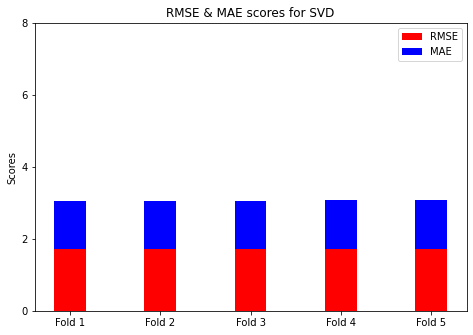

In [ ]:
#Code for visualization
#SVD
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(folds, svdRmse, width, color='r')
ax.bar(folds, svdMae, width,bottom = svdRmse, color='b')
ax.set_ylabel('Scores')
ax.set_title('RMSE & MAE scores for SVD')
ax.set_yticks(np.arange(0, 10, 2))
ax.legend(labels=['RMSE', 'MAE'])
plt.show()

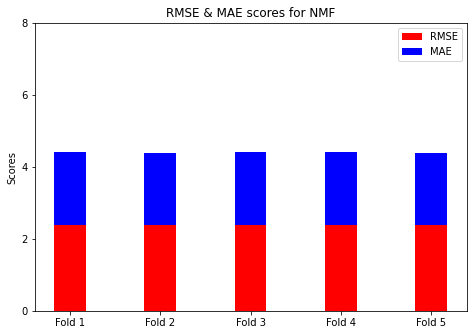

In [ ]:
#Code for visualization
#NMF
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(folds, nmfRmse, width, color='r')
ax.bar(folds, nmfMae, width,bottom = nmfRmse, color='b')
ax.set_ylabel('Scores')
ax.set_title('RMSE & MAE scores for NMF')
ax.set_yticks(np.arange(0, 10, 2))
ax.legend(labels=['RMSE', 'MAE'])
plt.show()

**4.4 Method 4**

#### Q: What assumptions need to be verified at this step?
#### A: Given a user u and a book b, we are finding the k-nearest neighbors of u who have rated book b and showing the average rating of the k users for the book b.
#### Q: What algorithm did you choose?
#### A: **Clustering-KNN means**
#### Q: Why you choose this algorithm?
#### A: KNN is very easy to implement. There are only two parameters required to implement KNN i.e. the value of K and the distance function. We have used Euclidean to calculate the distance.
#### Q: What metric can measure the quality of your algorithm?
#### A: We have used **Root-mean-square error (RMSE)** to evaluate our algorithm.
#### Q: What is the outcome?
#### A: We have implemented unsupervised algorithms with “sklearn.neighbors” library. The algorithm we used to compute the nearest neighbors is “brute”, and we specify “cosine metric” so that the algorithm will calculate the cosine similarity between rating vectors. Finally, we fit the model. The data has been limited to US and Canada users as we might run into memory issues, if implemented on large amounts of data. 
#### Q: Analysis and discussion:
#### A: When we take k=1, we get a very high RMSE value. The RMSE value decreases as we increase the k value. At k=6, the RMSE is approximately 3.59, and after that the value remains constant as the k increases.

In [ ]:
# code for modeling
combine_book_rating = df[['User-ID', 'ISBN', 'Book-Rating', 'Book-Title']]
combine_book_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,276725,034545104X,0,Flesh Tones A Novel
1,2313,034545104X,5,Flesh Tones A Novel
2,6543,034545104X,5,Flesh Tones A Novel
3,8680,034545104X,5,Flesh Tones A Novel
4,10314,034545104X,9,Flesh Tones A Novel


In [ ]:
#group by book titles and create a new column for total rating count.
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['Book-Title'])

book_ratingcount = (combine_book_rating.
                    groupby(by = ['Book-Title',])['Book-Rating'].
                    count().
                    reset_index().
                    rename(columns = {'Book-Rating':'TotalRatingCount'})
                    [['Book-Title','TotalRatingCount']])

In [ ]:
book_ratingcount.sort_values(by='Book-Title', ascending= True)

,Book-Title,TotalRatingCount
0,A Novel,1
1,A Nutshell handbook,1
2,And for Starters,1
3,steigen aus maschine brennt 10 Flieg...,1
4,vol ÃÂÃÂ bord du Concordia He...,1
...,...,...
240893,ÃÂ ÃÂ lpiraten,2
240894,ÃÂ ÃÂ rger mit Produkt X Roman,4
240895,ÃÂ ÃÂ sterlich leben,1
240896,ÃÂ ÃÂ stlich der Berge,3


In [ ]:
# Combine the rating data with the total rating count data, this gives us exactly what we need to filter out the lesser known books.
rating_with_totalratingcount = combine_book_rating.merge(book_ratingcount, left_on = 'Book-Title', right_on = 'Book-Title', how = 'inner' )

In [ ]:
rating_with_totalratingcount.head()

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount
0,276725,034545104X,0,Flesh Tones A Novel,60
1,2313,034545104X,5,Flesh Tones A Novel,60
2,6543,034545104X,5,Flesh Tones A Novel,60
3,8680,034545104X,5,Flesh Tones A Novel,60
4,10314,034545104X,9,Flesh Tones A Novel,60


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingcount['TotalRatingCount'].describe())

count   240898.000
mean         3.666
std         13.547
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       2502.000
Name: TotalRatingCount, dtype: float64


In [ ]:
# The median book has been rated only once. Let’s look at the top of the distribution:
print(book_ratingcount['TotalRatingCount'].quantile(np.arange(.9,1,.01)))

0.900    6.000
0.910    7.000
0.920    7.000
0.930    8.000
0.940   10.000
0.950   11.000
0.960   13.000
0.970   17.000
0.980   23.000
0.990   39.000
Name: TotalRatingCount, dtype: float64


In [ ]:
# About 1% of the books received 50 or more ratings. Because we have so many books in our data, we will limit it to the top 1%.
popularity_threshold = 50
rating_popular_book = rating_with_totalratingcount.query('TotalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount
0,276725,034545104X,0,Flesh Tones A Novel,60
1,2313,034545104X,5,Flesh Tones A Novel,60
2,6543,034545104X,5,Flesh Tones A Novel,60
3,8680,034545104X,5,Flesh Tones A Novel,60
4,10314,034545104X,9,Flesh Tones A Novel,60


In [ ]:
rating_popular_book.info

<bound method DataFrame.info of         User-ID        ISBN  ...            Book-Title TotalRatingCount
0        276725  034545104X  ...  Flesh Tones  A Novel               60
1          2313  034545104X  ...  Flesh Tones  A Novel               60
2          6543  034545104X  ...  Flesh Tones  A Novel               60
3          8680  034545104X  ...  Flesh Tones  A Novel               60
4         10314  034545104X  ...  Flesh Tones  A Novel               60
...         ...         ...  ...                   ...              ...
607070   241666  0451180216  ...   Interest of Justice               52
607071   242106  0451180216  ...   Interest of Justice               52
607072   252347  0451180216  ...   Interest of Justice               52
607073   274308  0451180216  ...   Interest of Justice               52
607074   274549  0451180216  ...   Interest of Justice               52

[194382 rows x 5 columns]>

In [ ]:
userdata = df[['User-ID', 'Country']]

In [ ]:
# Filter to users in US and Canada only:
# In order to improve computing speed, and not run into the “MemoryError” issue, I will limit our user data to those in the US and Canada. 
# And then combine the user data with rating data and total rating count data.
combined = rating_popular_book.merge(userdata, left_on = 'User-ID', right_on = 'User-ID', how = 'left')

In [ ]:
us_canada_user_rating = combined[combined['Country'].str.contains("usa|canada", case=False)]
us_canada_user_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount,Country
0,276725,034545104X,0,Flesh Tones A Novel,60,USA
1,2313,034545104X,5,Flesh Tones A Novel,60,USA
2,2313,034545104X,5,Flesh Tones A Novel,60,USA
3,2313,034545104X,5,Flesh Tones A Novel,60,USA
4,2313,034545104X,5,Flesh Tones A Novel,60,USA


In [ ]:
combined.head()

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount,Country
0,276725,034545104X,0,Flesh Tones A Novel,60,USA
1,2313,034545104X,5,Flesh Tones A Novel,60,USA
2,2313,034545104X,5,Flesh Tones A Novel,60,USA
3,2313,034545104X,5,Flesh Tones A Novel,60,USA
4,2313,034545104X,5,Flesh Tones A Novel,60,USA


In [ ]:
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['User-ID', 'Book-Title'])

In [ ]:
us_canada_user_rating.shape

(169855, 6)

In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'Book-Title',columns = 'User-ID', values = 'Book-Rating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

In [ ]:
# Finding the Nearest Neighbors
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Key of Light  Key Trilogy  Paperback  :

1: Key of Knowledge  Key Trilogy  Paperback  , with distance of 0.2576397362436048:
2: Key of Valor  Roberts  Nora  Key Trilogy  3  , with distance of 0.3056464897026928:
3: Face the Fire  Three Sisters Island Trilogy , with distance of 0.7260826806641449:
4: Sea Swept  Quinn Brothers  Paperback  , with distance of 0.7311679236410074:
5: Reflections And Dreams, with distance of 0.7580032156964608:


In [ ]:
data = pd.merge(ratings, users, on = 'User-ID', how = 'inner')
data = data.drop(columns=['ISBN', 'Location'])

# Separate the target and split the data into train and test sets
y = np.asarray(data['Book-Rating'] )
y = y.reshape(y.shape[0],1)
feature_cols = data.columns.to_list()
feature_cols.remove('Book-Rating')
x = np.asarray(data[feature_cols])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#For Testing KNN model
rmse_val = [] #to store rmse values for different k
for K in range(6):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 4.665129473506045
RMSE value for k=  2 is: 4.045515828197885
RMSE value for k=  3 is: 3.8153828376739107
RMSE value for k=  4 is: 3.7029941382885663
RMSE value for k=  5 is: 3.644338296752883
RMSE value for k=  6 is: 3.5912007567786137


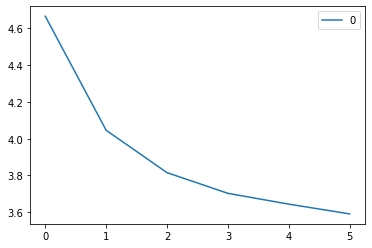

In [ ]:
# code for visualization the outcome
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

**4.5 Method 5**

#### Q: What assumptions need to be verified at this step?
#### A: In this approach, we are extracting knowledge from our data set. The recommendations are dependent on the book details and hence it doesn't suffer with cold start problem. This helps in accurately predicting the user’s ratings for modeled items.
#### Q: What algorithm did you choose?
#### A: Content Based Recommendation
#### Q: Why you choose this algorithm?
#### A: We decided to try this approach because the vast majority of the text we had describing any given book consisted of very opinionated ratings, and trying a method of modeling the books that leveraged that fact made sense.
#### Q: What metric can measure the quality of your algorithm?
#### A: **Mean Average Precision (MAP**) can meausre the accuracy but real users are required to perform the same. Hence we could not measure the accuracy.
#### Q: What is the outcome?
#### A: In the first approach, the similarity was built on the combination of book title, author and publisher. The similarity between the books was calculated using cosine similarity. In the second approach we calculated the decade of the years over which the books were published to calculate the categories of books read by the users. 
#### Q: Analysis and discussion:
#### A: Since the system do not require the data related to past activities, the recommendations are obvious based on the metadata. Hence we will have to combine it with some other model to obtain better predictions.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re


def clean_fields(x, combine=False):
    """clean string field"""
    x = x.lower()
    x = re.sub('[^a-z0-9 ]', '', x)
    if combine:
        return ''.join(x.replace(' ', '') for x in x).strip()
    return x.strip()

# sort and return top
def sort_sims(sim_scores, topN=10):
    """sort scores by value of dict and return topN results"""
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    return sim_scores[:topN+1]
        


class ContentBased(object):
    """
    Content Based Filtering

    Attributes:
        ratings (pandas df): ratings dataframe 
        books (pandas df): book information dataframe 
        cosine_sim (sparse matrix): cosine similarity matrix
        indices (pandas df): Book Title Series 
    """
    def __init__(self, ratings, books):
        """
        Args:
            ratings (pandas df): ratings dataframe 
            books (pandas df): book information dataframe 
        """
        self.ratings = ratings
        books = self.prepare_data(books, ratings)
        self.cosine_sim, self.books, self.indices = self.compute_similarity(books)
        
    def prepare_data(self, books, ratings, rating_threshold=2):
        """
        Cleans and subsets book dataframe
        Args:
            ratings (pandas df): ratings dataframe 
            books (pandas df): book information dataframe
            rating_threshold (int): threshold to limit rating count 
        Returns:
            books (pandas df): book information dataframe 
        """
        books = books[books['ISBN'].isin(ratings['ISBN'])]
        books = books.drop_duplicates(subset=['Book-Title'])
        most_popular_ISBN = list(ratings['ISBN'].value_counts()[ratings['ISBN'].value_counts() >= rating_threshold].index)
        books = books[books.ISBN.isin(most_popular_ISBN)]
        books['Publisher'] = books['Publisher'].map(lambda x: clean_fields(x, combine=True))
        books['Book-Author'] = books['Book-Author'].map(lambda x: clean_fields(x, combine=True))
        books['Book-Title-Clean'] = books['Book-Title'].map(lambda x: clean_fields(x, combine=False))
        books['soup'] = books['Book-Title-Clean'] + ' ' + books['Book-Author'] + ' ' + books['Publisher']
        return books 
        
    def compute_similarity(self, books):
        """
        Creates BOW model on the combined book text fields and computes similarity
        Args:
            books (pandas df): book information dataframe
        Returns:
            books (pandas df): book information dataframe 
            cosine_sim (sparse matrix): cosine similarity matrix
            indices (pandas df): Book Title Series  
        """
        vect = CountVectorizer(stop_words='english', max_features=1000)
        count_matrix = vect.fit_transform(books['soup'])
        cosine_sim = cosine_similarity(count_matrix, count_matrix)
        books = books.reset_index()
        indices = pd.Series(books.index, index=books['Book-Title']).drop_duplicates()
        return cosine_sim, books, indices
    
    def compute_year_similarity(self, book1, book2, value=10):
        """
        Computes similarity score based on year with exponential decay 
        Args:
            book1 (int): year of book1
            book2 (int): year of book2
        Returns:
            sim (int): similarity score
        """
        diff = abs(book1 - book2)
        sim = np.exp(-int(diff) / value)
        return sim
        
    def get_recommendations(self, title, topN=10):
        """
        Generate recommendations based on cosine similarity and year similarity based on similar books
        Return topN similar Book Titles 
        Args:
            title (str): Book Title to use for comparison
            topN (int): how many similar books to recommend 
        Returns:
            indices (pandas df): Top N most similar books to passed in book 
        """
        # Get the index of the book that matches the title
        idx = self.indices[title]
        year = self.books['Year-Of-Publication'] [self.books['Book-Title'] == title]
        if isinstance(idx, pd.Series):
            idx = idx.iloc[0]
            year = year.iloc[0]
        # Get the pairwsie similarity scores of all books with that book
        sim_scores = list(enumerate(self.cosine_sim[idx]))
        sim_scores = sort_sims(sim_scores, topN=50)

        # Get the book indices
        book_indices = [i[0] for i in sim_scores]
        year_scores = self.books['Year-Of-Publication'].iloc[book_indices].map(lambda x: self.compute_year_similarity(x, year)).values
        # multiply vect scores with year scores 
        final_scores = list(zip(book_indices, np.array([i[1] for i in sim_scores]) * year_scores))
        sim_scores = sort_sims(sim_scores, topN=topN)

        # remove current title
        book_indices = []
        for i, _ in sim_scores:
            if i != idx:
                book_indices.append(i)

        # Return the top N most similar books
        return self.books['Book-Title'].iloc[book_indices]

In [ ]:
# Create model 
content_rec = ContentBased(ratings, books)

In [ ]:
# Most similar books to Congo
content_rec.get_recommendations("Congo")

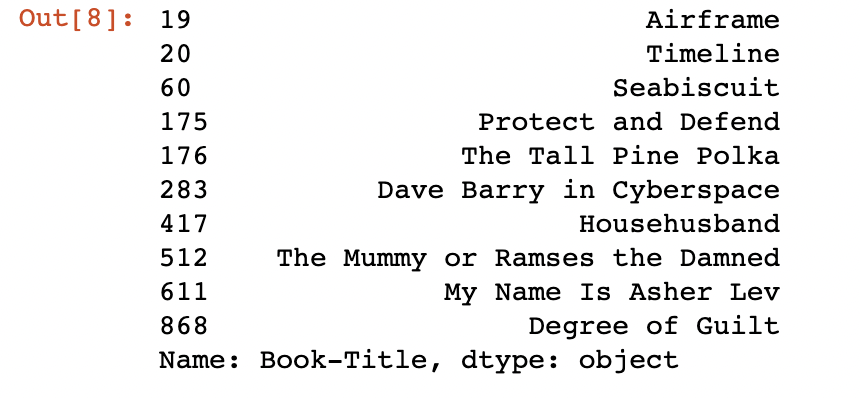

**4.6 Method 6**

#### Q: What assumptions need to be verified at this step?
#### A: Verifying the combination of content based and collaborative fitering models.
#### Q: What algorithm did you choose?
#### A: Hybrid Model
#### Q: Why you choose this algorithm?
#### A: Hybrid recommenders enable you to combine the forces of different recommenders to get better results.
#### Q: What is the outcome?
#### A: First, we have implemented the content-based filter on the books and their ratings. Their similarity scores and book indices are calculated for the books. These indices are sorted in descending model and the top 50 books are calculated. This data is stored in a form of a list. This list is then implemented with the SVD CF model, which outputs an estimation value of the required books. The estimated value is sorted in the descending order and top 10 books are displayed. Hence, the best of both worlds is obtained by implementing the CF and content-based model.
#### Q: Analysis and discussion:
#### A: It performes better when contrasted with different models as it's a combination of CF and content based model. It beats the cold start problem of collaborative filters by utilizing a content-based recommender, and, as you steadily begin reading and rating books, it brings its collaborative filters into play. This is undeniably more effective, so most practical recommender frameworks are hybrid in nature.

In [ ]:
#Build title to ID and ID to title mappings
id_map = books
id_to_title = id_map.set_index('ISBN')
title_to_id = id_map.set_index('Book-Title')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re


def clean_fields(x, combine=False):
    """clean string field"""
    x = x.lower()
    x = re.sub('[^a-z0-9 ]', '', x)
    if combine:
        return ''.join(x.replace(' ', '') for x in x).strip()
    return x.strip()

# sort and return top
def sort_sims(sim_scores, topN=10):
    """sort scores by value of dict and return topN results"""
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    return sim_scores[:topN+1]
        


class Hybrid(object):
    """
    Content Based Filtering

    Attributes:
        ratings (pandas df): ratings dataframe 
        books (pandas df): book information dataframe 
        cosine_sim (sparse matrix): cosine similarity matrix
        indices (pandas df): Book Title Series 
    """
    def __init__(self, ratings, books):
        """
        Args:
            ratings (pandas df): ratings dataframe 
            books (pandas df): book information dataframe 
        """
        self.ratings = ratings
        books = self.prepare_data(books, ratings)
        self.cosine_sim, self.books, self.indices = self.compute_similarity(books)
        
    def getdata(self):
        return self.userId
    
    def prepare_data(self, books, ratings, rating_threshold=2):
        """
        Cleans and subsets book dataframe
        Args:
            ratings (pandas df): ratings dataframe 
            books (pandas df): book information dataframe
            rating_threshold (int): threshold to limit rating count 
        Returns:
            books (pandas df): book information dataframe 
        """
        books = books[books['ISBN'].isin(ratings['ISBN'])]
        books = books.drop_duplicates(subset=['Book-Title'])
        most_popular_ISBN = list(ratings['ISBN'].value_counts()[ratings['ISBN'].value_counts() >= rating_threshold].index)
        books = books[books.ISBN.isin(most_popular_ISBN)]
        books['Publisher'] = books['Publisher'].map(lambda x: clean_fields(x, combine=True))
        books['Book-Author'] = books['Book-Author'].map(lambda x: clean_fields(x, combine=True))
        books['Book-Title-Clean'] = books['Book-Title'].map(lambda x: clean_fields(x, combine=False))
        books['soup'] = books['Book-Title-Clean'] + ' ' + books['Book-Author'] + ' ' + books['Publisher']
        return books 
        
    def compute_similarity(self, books):
        """
        Creates BOW model on the combined book text fields and computes similarity
        Args:
            books (pandas df): book information dataframe
        Returns:
            books (pandas df): book information dataframe 
            cosine_sim (sparse matrix): cosine similarity matrix
            indices (pandas df): Book Title Series  
        """
        vect = CountVectorizer(stop_words='english', max_features=1000)
        count_matrix = vect.fit_transform(books['soup'])
        cosine_sim = cosine_similarity(count_matrix, count_matrix)
        books = books.reset_index()
        indices = pd.Series(books.index, index=books['Book-Title']).drop_duplicates()
        return cosine_sim, books, indices
    
    def compute_year_similarity(self, book1, book2, value=10):
        """
        Computes similarity score based on year with exponential decay 
        Args:
            book1 (int): year of book1
            book2 (int): year of book2
        Returns:
            sim (int): similarity score
        """
        diff = abs(book1 - book2)
        sim = np.exp(-int(diff) / value)
        return sim
        
    def get_recommendations(self, userId, title):
        """
        Generate recommendations based on cosine similarity and year similarity based on similar books
        Return topN similar Book Titles 
        Args:
            title (str): Book Title to use for comparison
            topN (int): how many similar books to recommend 
        Returns:
            indices (pandas df): Top N most similar books to passed in book 
        """
        # Get the index of the book that matches the title
        idx = self.indices[title]
        year = self.books['Year-Of-Publication'] [self.books['Book-Title'] == title]
        if isinstance(idx, pd.Series):
            idx = idx.iloc[0]
            year = year.iloc[0]
        # Get the pairwsie similarity scores of all books with that book
        sim_scores = list(enumerate(self.cosine_sim[idx]))
        sim_scores = sort_sims(sim_scores, topN=50)

        # Get the book indices
        book_indices = [i[0] for i in sim_scores]
        self.books = self.books.iloc[book_indices][['Book-Title', 'Book-Author', 'Year-Of-Publication']]

        #Compute the predicted ratings using the SVD filter
        self.books['est'] = self.books['Book-Title'].apply(lambda x: model.predict(userId, id_to_title.loc[x]['ISBN']).est)
    
        #Sort the movies in decreasing order of predicted rating
        self.books = self.books.sort_values('est', ascending=False)
    
        #Return the top 10 movies as recommendations
        return self.books.head(10)

In [ ]:
# Create model 
hybrid_rec = Hybrid(ratings, books)

In [ ]:
hybrid_rec.get_recommendations(1, 'The Hobbit')

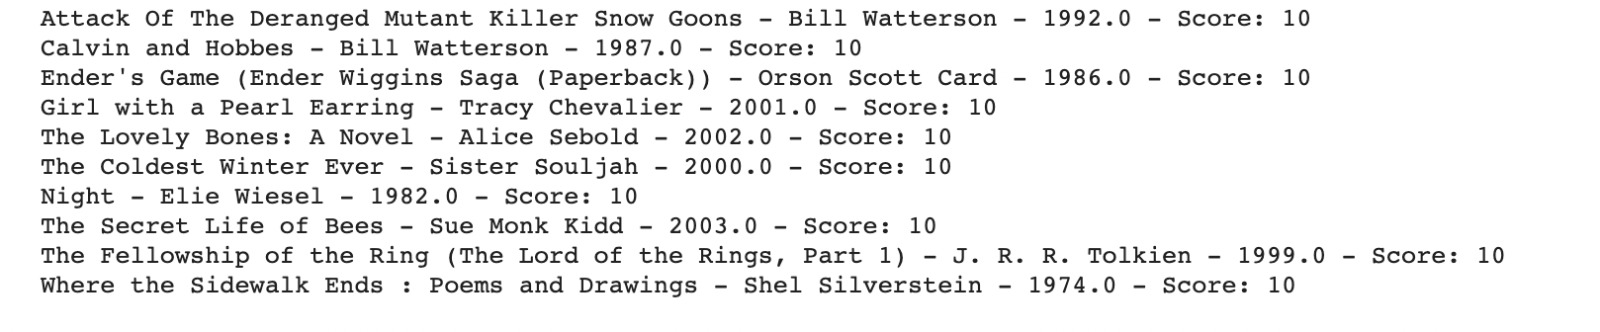